In [1]:
import cv2 
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

from HVision.show_array import show_array
from HVision.set_memory_limit import set_memory_limit
set_memory_limit(20*1024*1024)
import os
print("PID: " + str(os.getpid()))

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 15, 8

PID: 10835


In [2]:
img = cv2.imread("image.png", 1)

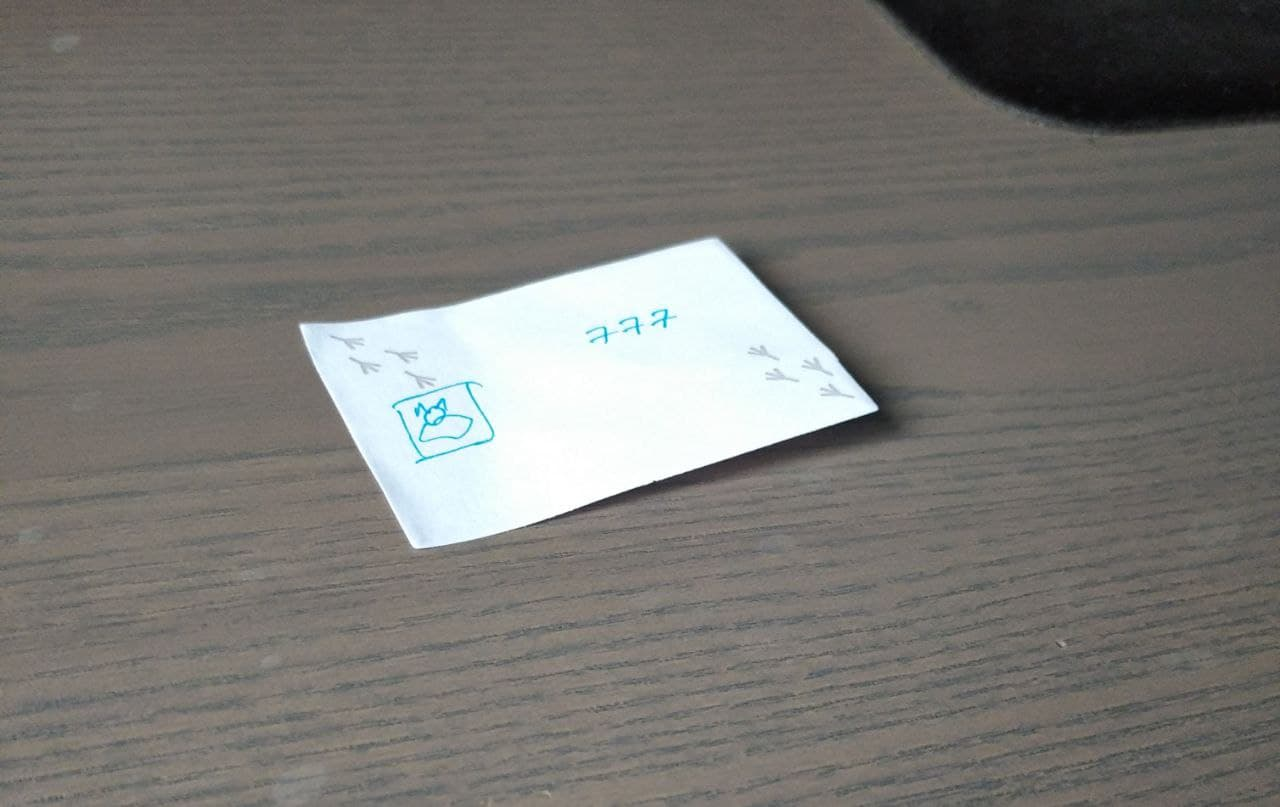

In [3]:
show_array(img)

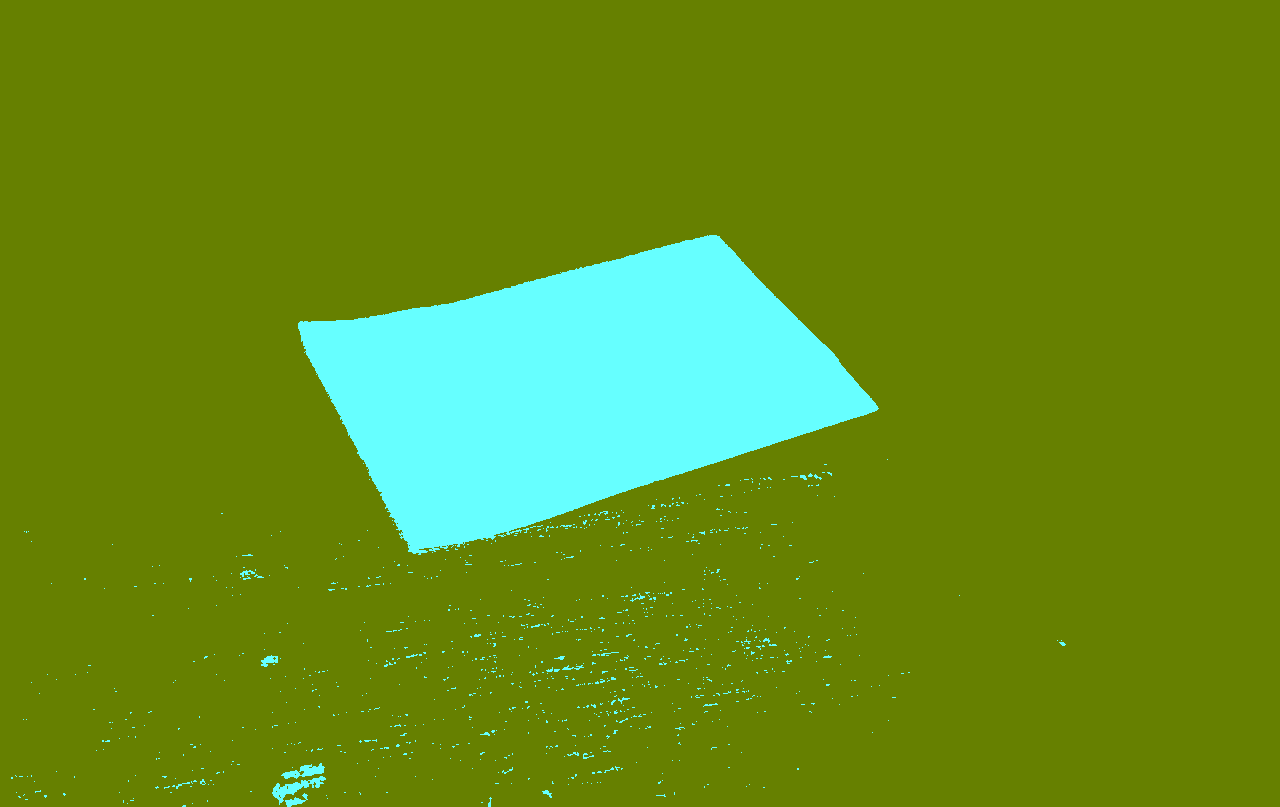

In [5]:
mask = (img[:, :, 0] > 128).astype(np.uint8)
show_array(mask)

In [7]:
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask , connectivity , cv2.CV_32S)

In [8]:
for idx in range(stats.shape[0]):
    area = stats[idx, cv2.CC_STAT_AREA]
    if area > 500:
        print(idx)


0
1


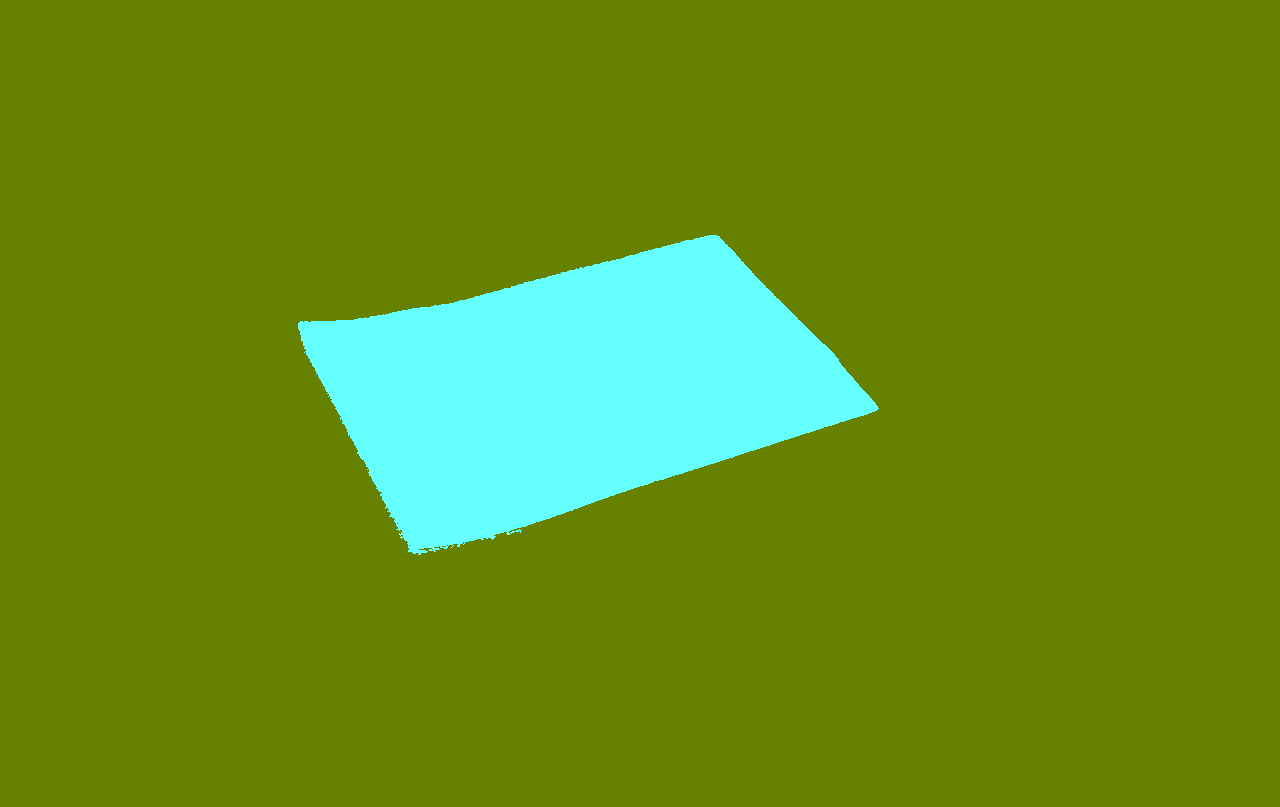

In [11]:
# 0 - always background

white = (labels == 1).astype(np.uint8)
show_array(white)

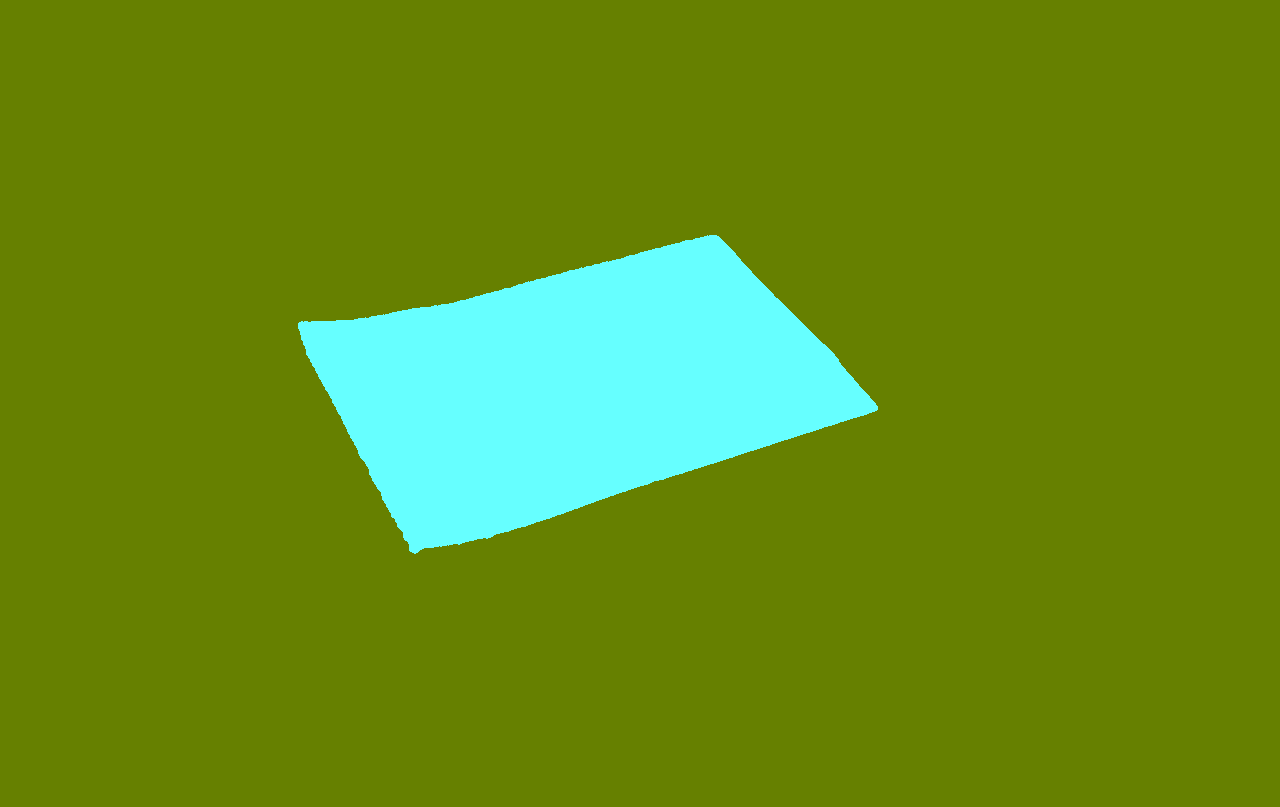

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))

white_ = white.copy()
white_ = cv2.morphologyEx(white_, cv2.MORPH_OPEN, kernel)
white_ = cv2.morphologyEx(white_, cv2.MORPH_CLOSE, kernel)

show_array(white_)

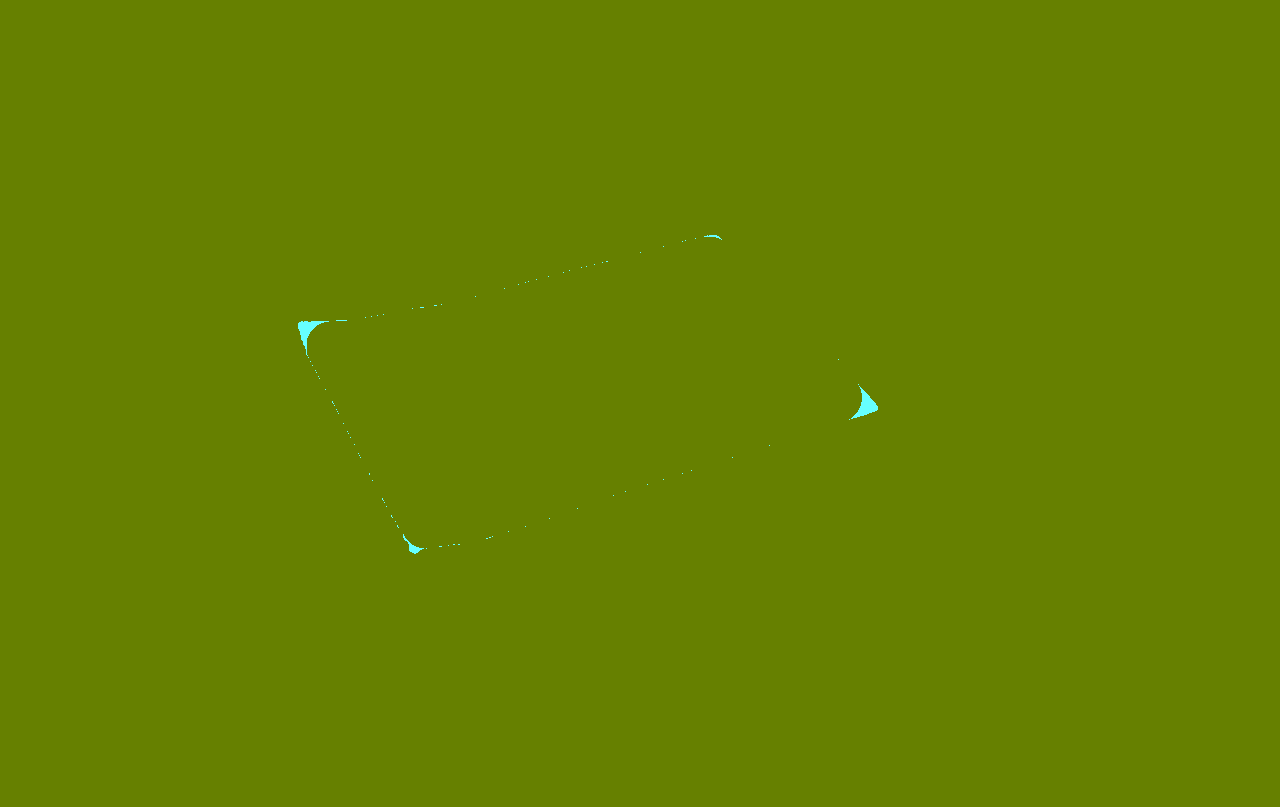

In [23]:
kernel_c = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50,50))
w = cv2.morphologyEx(white_, cv2.MORPH_OPEN, kernel_c)
w = (w != white_).astype(np.uint8)
show_array(w)

In [24]:
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(w, connectivity , cv2.CV_32S)


In [26]:
np.argsort(stats[:, cv2.CC_STAT_AREA])

array([84, 37, 38, 39, 41, 75, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 69, 68, 67, 74, 65, 64, 71, 63, 61, 60, 58, 57, 56, 55, 62, 35,
       36, 33,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 34, 17,
       16, 19, 32, 31, 78, 18, 27, 26, 28, 25, 24, 80, 22, 20, 72,  7, 77,
       79, 81, 82, 59, 73, 42, 66, 83, 21, 70, 23, 30,  1, 76, 29, 40,  0])

In [27]:
result = np.zeros(labels.shape)

In [28]:
for m in [1, 76, 29, 40]:
    result[labels==m] = 1

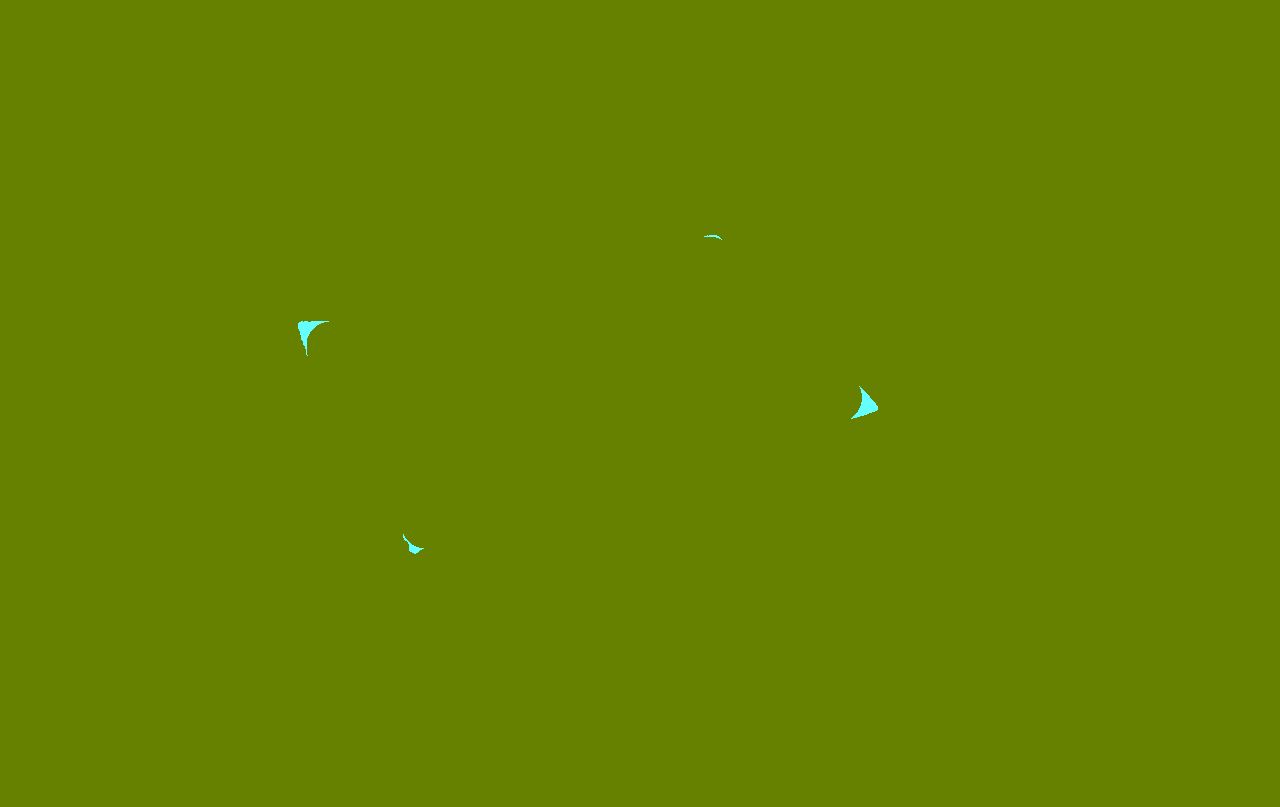

In [29]:
show_array(result)